In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree, svm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from scipy import interpolate, stats

from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)

 
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from scipy import interpolate, stats
import forestci as fci
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 


Failed to import duecredit due to No module named 'duecredit'
/home/bita/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def SetPlotStyle():
   plt.rcParams['axes.linewidth']  = 1.5
   plt.rcParams['axes.labelsize']  = 28
   plt.rcParams['axes.titlesize']  = 22
   plt.rcParams['xtick.labelsize'] = 20
   plt.rcParams['ytick.labelsize'] = 18
   plt.rcParams['xtick.major.size'] = 7
   plt.rcParams['ytick.major.size'] = 7
   plt.rcParams['xtick.minor.size'] = 3
   plt.rcParams['ytick.minor.size'] = 3
   plt.rcParams['legend.fontsize']  = 20
   plt.rcParams['legend.frameon']  = False

   plt.rcParams['xtick.major.width'] = 1
   plt.rcParams['ytick.major.width'] = 1
   plt.rcParams['xtick.minor.width'] = 1
   plt.rcParams['ytick.minor.width'] = 1
   plt.rcParams["font.family"] = "serif" 
   # plt.clf()
   # sns.set(rc('font',**{'family':'serif','serif':['Computer Modern']}))
   # sns.set_style("ticks", {'figure.facecolor': 'grey'})

SetPlotStyle()


# Considering the first run data sample:

In [3]:
data = pd.read_csv('/media/bita/disco/Pesquisa/ACT_PS/act_pointing_correction_codes/organized_tests/act_boresight/pointing_corr_arr4_f150_snrT25_obs0_FullSeason_withEverything.csv')

data.pop('Freq')
data.pop('Offset X')
data.pop('Error Offset X')
data.pop('Array')
#data.pop('APEX T')
dy_all_data = data['Error Offset Y']
data.pop('Error Offset Y')
data.pop('Modulus Offset')

data.pop('T_Pan_R8_3')#temp bizarra
data.pop('T_Pan_R1_2')#temp bizarra

data.pop('T_Pan_R8_6')
data.pop('T_Pan_R7_8')
data.pop('T_Pan_R7_5')
data.pop('T_Pan_R7_3')
data.pop('T_Pan_R6_6')
data.pop('T_Pan_R6_3')
# data.pop('T_Pan_R5_5Lo')#**
# data.pop('T_Pan_R5_5Hi')#**
data.pop('T_Pan_R4_6')
data.pop('T_Pan_R4_3')
data.pop('T_Pan_R3_7')
data.pop('T_Pan_R3_5')
data.pop('T_Pan_R2_2')
data.pop('T_Pan_R2_6')
data.pop('T_Pan_R3_1')
data.pop('T_Pan_R5_9')

# data.pop('Elevation')
# data.pop('Elevation 2 hr ago')

# data.pop('Elevation Sun')
# data.pop('Elevation Sun 2 hr ago')

# data.pop('Azimuth')
# data.pop('Azimuth 2 hr ago')

# data.pop('Azimuth Sun')
# data.pop('Azimuth Sun 2 hr ago')

# data.pop('Angular Distance')
# data.pop('Angular Distance 2 hr ago')
# data.pop('APEX T')


data['Ctime']= (data['Ctime']-1514764800)/(60*60*24) #transform ctime --> days 
data_time_all = data['Ctime']
data.pop('Ctime')
data = data.dropna()

 
data.tail()


,Offset Y,APEX T,APEX T 2 hr ago,Elevation 2 hr ago,Azimuth 2 hr ago,Angular Distance 2 hr ago,Azimuth Sun 2 hr ago,Elevation Sun 2 hr ago,Elevation,Azimuth,T_Pan_R5_5Lo,T_Pan_R5_5Hi,Elevation Sun,Azimuth Sun,Angular Distance
72,0.7292,-10.890909,-10.745455,0.830079,2.178171,1.983149,1.688704,-1.115331,0.830079,5.639333,-8.081915,-8.233681,-0.634197,1.473717,2.374473
73,0.5706,-9.918182,-10.627273,0.830079,2.178171,1.568710,1.462179,-0.601566,0.830079,4.078660,-8.346826,-8.423492,-0.129110,1.289835,2.378944
74,0.9763,-7.281818,-9.763636,0.830079,2.178171,1.196929,1.261318,-0.060389,0.786620,2.178520,6.881138,6.479902,0.378371,1.019858,1.018767
75,1.6986,-5.272727,-8.909091,0.786620,2.178171,1.052105,1.120662,0.224571,0.786620,2.178520,11.567260,10.737603,0.619824,0.784130,1.033122
76,1.8481,-4.854545,-7.981818,0.786620,2.178171,1.031577,1.072407,0.302881,0.786620,2.178520,11.681170,10.915642,0.679232,0.697358,1.054191


1) Do the random forest considering the full sample: obs1,obs2,obs3  and the full table of observables

In [4]:
#Split into training set and testing set:
train_dataset = data.sample(frac=0.75,random_state=42)
test_dataset = data.drop(train_dataset.index)
#Plotting statistics for the training set
train_stats = train_dataset.describe()
train_stats.pop("Offset Y")
train_stats = train_stats.transpose()

#Offset to compare:

train_labels = train_dataset.pop('Offset Y') #Used to learn
test_labels = test_dataset.pop('Offset Y') #Used to test the quality of the regression

print('Training Features Shape:', train_dataset.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:',test_dataset.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (58, 14)
Training Labels Shape: (58,)
Testing Features Shape: (19, 14)
Testing Labels Shape: (19,)


In [5]:

# create RandomForestRegressor
n_trees = 2000
rf_forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
rf_forest.fit(train_dataset, train_labels)
rf_hat = rf_forest.predict(test_dataset)


Metrics for Random Forest Trained on full Data
Average absolute error: 0.1561
Accuracy: 78.61 %.
0.20327307134934267 rms


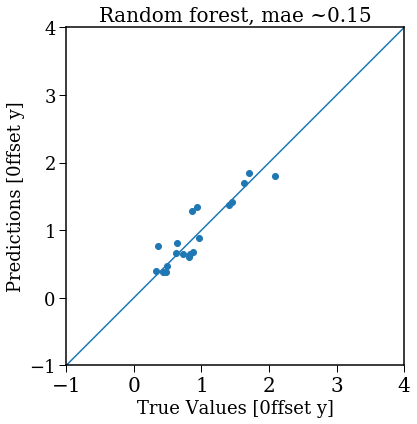

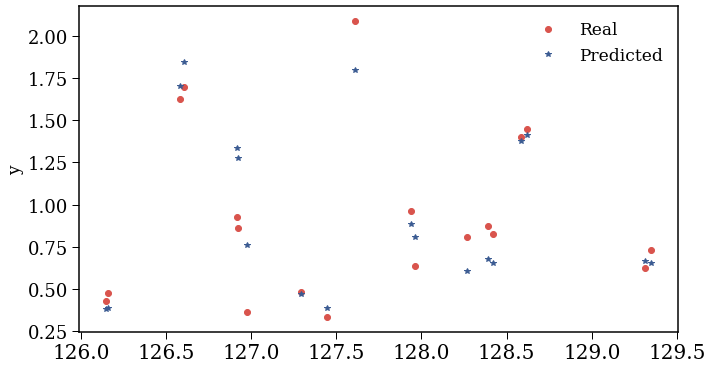

In [7]:
 
# Performance metrics
errors = abs(rf_hat - test_labels)

print('Metrics for Random Forest Trained on full Data')
print('Average absolute error:', round(np.mean(errors), 4))

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / test_labels))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
print(np.sqrt(np.mean(errors **2)),'rms')
# Plot predicted RF without error bars

plt.figure(figsize=(10,6))
a = plt.axes(aspect='equal')
plt.scatter(test_labels,rf_hat)
plt.xlabel('True Values [0ffset y]',fontsize=18)
plt.title('Random forest, mae ~0.15', fontsize=20)
plt.ylabel('Predictions [0ffset y]',fontsize=18)
lims = [-1, 4]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.tight_layout()


# SetPlotStyle()
import seaborn as sns
fig= plt.figure(figsize=(10,15))
plt.subplot(311)
plt.tight_layout()
plt.plot(data_time_all[test_dataset.index], test_labels,'o',color=sns.xkcd_rgb["pale red"],label='Real')
plt.plot(data_time_all[test_dataset.index], rf_hat,color=sns.xkcd_rgb["denim blue"],marker='*',linestyle = 'None',label='Predicted')
plt.ylabel('y',fontsize=17)
# plt.xlabel('days',fontsize=17)a
plt.legend(fontsize=17)
# plt.title(r'Random Forest- MAE $\sim$'+format(np.array(errors), '.3f'), fontsize=20)
plt.tight_layout()#%.2f


# ADD first run of obs with the second obs:

In [13]:
data_obs1 = pd.read_csv('/media/bita/disco/Pesquisa/ACT_PS/act_pointing_correction_codes/organized_tests/act_boresight/pointing_corr_arr4_f150_snrT25_obs0_FullSeason_withEverything.csv')
data_obs2  = pd.read_csv('/media/bita/disco/Pesquisa/ACT_PS/act_pointing_correction_codes/organized_tests/act_boresight/pointing_corr_arr4_f150_snrT25_obs1_FullSeason_withEverything.csv')
frames = [data_obs1, data_obs2]

data = pd.concat(frames)

data.pop('Freq')
data.pop('Offset X')
data.pop('Error Offset X')
data.pop('Array')
#data.pop('APEX T')
dy_all_data = data['Error Offset Y']
data.pop('Error Offset Y')
data.pop('Modulus Offset')

data.pop('T_Pan_R8_3')#temp bizarra
data.pop('T_Pan_R1_2')#temp bizarra

data.pop('T_Pan_R8_6')
data.pop('T_Pan_R7_8')
data.pop('T_Pan_R7_5')
data.pop('T_Pan_R7_3')
data.pop('T_Pan_R6_6')
data.pop('T_Pan_R6_3')
# data.pop('T_Pan_R5_5Lo')#**
# data.pop('T_Pan_R5_5Hi')#**
data.pop('T_Pan_R4_6')
data.pop('T_Pan_R4_3')
data.pop('T_Pan_R3_7')
data.pop('T_Pan_R3_5')
data.pop('T_Pan_R2_2')
data.pop('T_Pan_R2_6')
data.pop('T_Pan_R3_1')
data.pop('T_Pan_R5_9')

# data.pop('Elevation')
# data.pop('Elevation 2 hr ago')

# data.pop('Elevation Sun')
# data.pop('Elevation Sun 2 hr ago')

# data.pop('Azimuth')
# data.pop('Azimuth 2 hr ago')

# data.pop('Azimuth Sun')
# data.pop('Azimuth Sun 2 hr ago')

# data.pop('Angular Distance')
# data.pop('Angular Distance 2 hr ago')
# data.pop('APEX T')


data['Ctime']= (data['Ctime']-1514764800)/(60*60*24) #transform ctime --> days 
data_time_all = data['Ctime']
data.pop('Ctime')
data = data.dropna()

 
data.tail()
 

,Offset Y,APEX T,APEX T 2 hr ago,Elevation 2 hr ago,Azimuth 2 hr ago,Angular Distance 2 hr ago,Azimuth Sun 2 hr ago,Elevation Sun 2 hr ago,Elevation,Azimuth,T_Pan_R5_5Lo,T_Pan_R5_5Hi,Elevation Sun,Azimuth Sun,Angular Distance
239,1.9213,-5.409091,-7.836364,0.787493,2.178171,1.195950,1.132805,0.017291,0.787493,2.179044,4.160186,4.188306,0.424275,0.864775,1.098585
240,2.1505,-4.745455,-7.818182,0.787493,2.178171,1.179009,1.113416,0.056999,0.787493,2.179044,5.476110,5.453879,0.457325,0.832355,1.100022
241,2.1654,-4.645455,-8.100000,0.787493,2.178171,1.163543,1.093243,0.096262,0.787493,2.179044,6.551137,6.462072,0.489339,0.798255,1.103253
242,2.4279,-4.118182,-3.218182,1.048070,2.178171,1.410076,5.723595,0.651168,0.787493,4.091924,10.193992,11.333307,0.315611,5.328004,1.114871
243,2.1028,-4.500000,-3.290909,1.048070,2.178171,1.474694,5.630559,0.599000,0.700401,4.105189,9.824259,11.310989,0.239533,5.274770,1.111870


In [14]:
#Dividing into training set and testing set:
train_dataset = data.sample(frac=0.75,random_state=42)
test_dataset = data.drop(train_dataset.index)
#Plotting statistics for the training set
train_stats = train_dataset.describe()
train_stats.pop("Offset Y")
train_stats = train_stats.transpose()

#Offset to compare:

train_labels = train_dataset.pop('Offset Y') #Used to learn
test_labels = test_dataset.pop('Offset Y') #Used to test the quality of the regression


print('Training Features Shape:', train_dataset.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:',test_dataset.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (241, 14)
Training Labels Shape: (241,)
Testing Features Shape: (51, 14)
Testing Labels Shape: (51,)


In [15]:

# create RandomForestRegressor
n_trees = 2000
rf_forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
rf_forest.fit(train_dataset, train_labels)
rf_hat = rf_forest.predict(test_dataset)


Metrics for Random Forest Trained obs1+obs2
Average absolute error: 0.1182
Accuracy: 93.19 %.
0.16185434457757963 rms


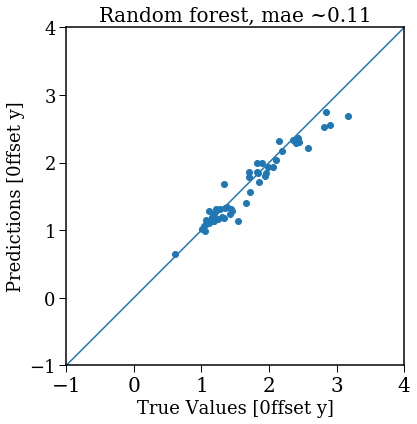

In [17]:
 
# Performance metrics
errors = abs(rf_hat - test_labels)

print('Metrics for Random Forest Trained obs1+obs2')
print('Average absolute error:', round(np.mean(errors), 4))

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / test_labels))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
print(np.sqrt(np.mean(errors **2)),'rms')
# Plot predicted RF without error bars

plt.figure(figsize=(10,6))
a = plt.axes(aspect='equal')
plt.scatter(test_labels,rf_hat)
plt.xlabel('True Values [0ffset y]',fontsize=18)
plt.title('Random forest, mae ~0.11', fontsize=20)
plt.ylabel('Predictions [0ffset y]',fontsize=18)
lims = [-1, 4]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.tight_layout()
  

In [23]:
np.shape(data_time_all[test_dataset.index])

(57,)

# testing only the run2 of observations


In [35]:
data  = pd.read_csv('/media/bita/disco/Pesquisa/ACT_PS/act_pointing_correction_codes/organized_tests/act_boresight/pointing_corr_arr4_f150_snrT25_obs1_FullSeason_withEverything.csv')

data.pop('Freq')
data.pop('Offset X')
data.pop('Error Offset X')
data.pop('Array')
#data.pop('APEX T')
dy_all_data = data['Error Offset Y']
data.pop('Error Offset Y')
data.pop('Modulus Offset')

data.pop('T_Pan_R8_3')#temp bizarra
data.pop('T_Pan_R1_2')#temp bizarra

data.pop('T_Pan_R8_6')
data.pop('T_Pan_R7_8')
data.pop('T_Pan_R7_5')
data.pop('T_Pan_R7_3')
data.pop('T_Pan_R6_6')
data.pop('T_Pan_R6_3')
# data.pop('T_Pan_R5_5Lo')#**
# data.pop('T_Pan_R5_5Hi')#**
data.pop('T_Pan_R4_6')
data.pop('T_Pan_R4_3')
data.pop('T_Pan_R3_7')
data.pop('T_Pan_R3_5')
data.pop('T_Pan_R2_2')
data.pop('T_Pan_R2_6')
data.pop('T_Pan_R3_1')
data.pop('T_Pan_R5_9')

# data.pop('Elevation')
# data.pop('Elevation 2 hr ago')

# data.pop('Elevation Sun')
# data.pop('Elevation Sun 2 hr ago')

# data.pop('Azimuth')
# data.pop('Azimuth 2 hr ago')

# data.pop('Azimuth Sun')
# data.pop('Azimuth Sun 2 hr ago')

# data.pop('Angular Distance')
# data.pop('Angular Distance 2 hr ago')
# data.pop('APEX T')


data['Ctime']= (data['Ctime']-1514764800)/(60*60*24) #transform ctime --> days 
data_time_all = data['Ctime']
data.pop('Ctime')
data = data.dropna()

 
data.tail()
 

,Offset Y,APEX T,APEX T 2 hr ago,Elevation 2 hr ago,Azimuth 2 hr ago,Angular Distance 2 hr ago,Azimuth Sun 2 hr ago,Elevation Sun 2 hr ago,Elevation,Azimuth,T_Pan_R5_5Lo,T_Pan_R5_5Hi,Elevation Sun,Azimuth Sun,Angular Distance
239,1.9213,-5.409091,-7.836364,0.787493,2.178171,1.195950,1.132805,0.017291,0.787493,2.179044,4.160186,4.188306,0.424275,0.864775,1.098585
240,2.1505,-4.745455,-7.818182,0.787493,2.178171,1.179009,1.113416,0.056999,0.787493,2.179044,5.476110,5.453879,0.457325,0.832355,1.100022
241,2.1654,-4.645455,-8.100000,0.787493,2.178171,1.163543,1.093243,0.096262,0.787493,2.179044,6.551137,6.462072,0.489339,0.798255,1.103253
242,2.4279,-4.118182,-3.218182,1.048070,2.178171,1.410076,5.723595,0.651168,0.787493,4.091924,10.193992,11.333307,0.315611,5.328004,1.114871
243,2.1028,-4.500000,-3.290909,1.048070,2.178171,1.474694,5.630559,0.599000,0.700401,4.105189,9.824259,11.310989,0.239533,5.274770,1.111870


In [36]:
#Dividing into training set and testing set:
train_dataset = data.sample(frac=0.75,random_state=42)
test_dataset = data.drop(train_dataset.index)
#Plotting statistics for the training set
train_stats = train_dataset.describe()
train_stats.pop("Offset Y")
train_stats = train_stats.transpose()

#Offset to compare:

train_labels = train_dataset.pop('Offset Y') #Used to learn
test_labels = test_dataset.pop('Offset Y') #Used to test the quality of the regression


print('Training Features Shape:', train_dataset.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:',test_dataset.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (183, 14)
Training Labels Shape: (183,)
Testing Features Shape: (61, 14)
Testing Labels Shape: (61,)


In [37]:
 
# create RandomForestRegressor
n_trees = 2000
rf_forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
rf_forest.fit(train_dataset, train_labels)
rf_hat = rf_forest.predict(test_dataset)

Metrics for Random Forest Trained  only obs2
Average absolute error: 0.141
Accuracy: 92.36 %.
0.18732130602643593 rms


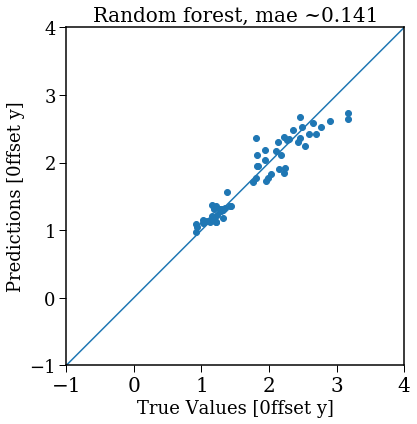

In [38]:

# Performance metrics
errors = abs(rf_hat - test_labels)

print('Metrics for Random Forest Trained  only obs2')
print('Average absolute error:', round(np.mean(errors), 4))

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / test_labels))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
print(np.sqrt(np.mean(errors **2)),'rms')
# Plot predicted RF without error bars

plt.figure(figsize=(10,6))
a = plt.axes(aspect='equal')
plt.scatter(test_labels,rf_hat)
plt.xlabel('True Values [0ffset y]',fontsize=18)
plt.title('Random forest, mae ~0.141', fontsize=20)
plt.ylabel('Predictions [0ffset y]',fontsize=18)
lims = [-1, 4]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.tight_layout()
  

# Using the whole data to perform the regression:

,Offset Y,APEX T,APEX T 2 hr ago,Elevation 2 hr ago,Azimuth 2 hr ago,Angular Distance 2 hr ago,Azimuth Sun 2 hr ago,Elevation Sun 2 hr ago,Elevation,Azimuth,T_Pan_R5_5Lo,T_Pan_R5_5Hi,Elevation Sun,Azimuth Sun,Angular Distance
1467,0.1211,-0.954545,-0.918182,0.699528,0.927992,1.923560,2.481119,-0.587254,0.699528,0.927992,0.912055,0.888539,-0.226373,2.131115,1.446979
1468,-0.0695,-0.890909,-0.781818,0.699528,0.927992,1.789974,2.363467,-0.498916,0.699528,0.927992,0.654067,0.629650,-0.110557,2.062898,1.318067
1469,1.2048,4.136364,-0.400000,0.699528,0.927642,1.211229,2.011777,-0.009253,0.699528,0.862542,24.802774,25.608657,0.442908,1.841349,0.847712
1470,0.6847,7.127273,5.254545,0.699528,0.864113,0.764476,1.807493,0.557289,0.699528,5.409124,29.506207,30.144836,1.031679,1.687267,1.344860
1471,0.6625,7.227273,5.618182,0.699528,0.868476,0.711483,1.785118,0.637678,0.699528,5.409124,28.575813,29.109729,1.113681,1.668580,1.267329


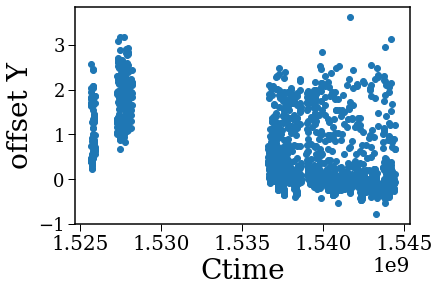

In [56]:
data_obs3 = pd.read_csv('/media/bita/disco/Pesquisa/ACT_PS/act_pointing_correction_codes/organized_tests/act_boresight/pointing_corr_arr4_f150_snrT25_obs2_FullSeason_withEverything.csv')
data_obs1 = pd.read_csv('/media/bita/disco/Pesquisa/ACT_PS/act_pointing_correction_codes/organized_tests/act_boresight/pointing_corr_arr4_f150_snrT25_obs0_FullSeason_withEverything.csv')
data_obs2 = pd.read_csv('/media/bita/disco/Pesquisa/ACT_PS/act_pointing_correction_codes/organized_tests/act_boresight/pointing_corr_arr4_f150_snrT25_obs1_FullSeason_withEverything.csv')
frames = [data_obs1, data_obs2, data_obs3]

data = pd.concat(frames)
plt.figure()
plt.plot(data['Ctime'], data['Offset Y'], 'o')
plt.xlabel('Ctime')
plt.ylabel('offset Y')

data.pop('Freq')
data.pop('Offset X')
data.pop('Error Offset X')
data.pop('Array')
#data.pop('APEX T')
dy_all_data = data['Error Offset Y']
data.pop('Error Offset Y')
data.pop('Modulus Offset')

data.pop('T_Pan_R8_3')#temp bizarra
data.pop('T_Pan_R1_2')#temp bizarra

data.pop('T_Pan_R8_6')
data.pop('T_Pan_R7_8')
data.pop('T_Pan_R7_5')
data.pop('T_Pan_R7_3')
data.pop('T_Pan_R6_6')
data.pop('T_Pan_R6_3')
# data.pop('T_Pan_R5_5Lo')#**
# data.pop('T_Pan_R5_5Hi')#**
data.pop('T_Pan_R4_6')
data.pop('T_Pan_R4_3')
data.pop('T_Pan_R3_7')
data.pop('T_Pan_R3_5')
data.pop('T_Pan_R2_2')
data.pop('T_Pan_R2_6')
data.pop('T_Pan_R3_1')
data.pop('T_Pan_R5_9')

# data.pop('Elevation')
# data.pop('Elevation 2 hr ago')

# data.pop('Elevation Sun')
# data.pop('Elevation Sun 2 hr ago')

# data.pop('Azimuth')
# data.pop('Azimuth 2 hr ago')

# data.pop('Azimuth Sun')
# data.pop('Azimuth Sun 2 hr ago')

# data.pop('Angular Distance')
# data.pop('Angular Distance 2 hr ago')
# data.pop('APEX T')


data['Ctime']= (data['Ctime']-1514764800)/(60*60*24) #transform ctime --> days 
data_time_all = data['Ctime']
data.pop('Ctime')
data = data.dropna()

 
data.tail()


In [40]:
#Dividing into training set and testing set:
train_dataset = data.sample(frac=0.75,random_state=42)
test_dataset = data.drop(train_dataset.index)
#Plotting statistics for the training set
train_stats = train_dataset.describe()
train_stats.pop("Offset Y")
train_stats = train_stats.transpose()

#Offset to compare:

train_labels = train_dataset.pop('Offset Y') #Used to learn
test_labels = test_dataset.pop('Offset Y') #Used to test the quality of the regression


print('Training Features Shape:', train_dataset.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:',test_dataset.shape)
print('Testing Labels Shape:', test_labels.shape) 

Training Features Shape: (1345, 14)
Training Labels Shape: (1345,)
Testing Features Shape: (338, 14)
Testing Labels Shape: (338,)


In [41]:

# create RandomForestRegressor
n_trees = 4000
rf_forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
rf_forest.fit(train_dataset, train_labels)
rf_hat = rf_forest.predict(test_dataset) 

Metrics for Random Forest Trained  only obs1+obs2+obs3
Average absolute error: 0.127
Accuracy: 117.28 %.
0.19655312954264148 rms


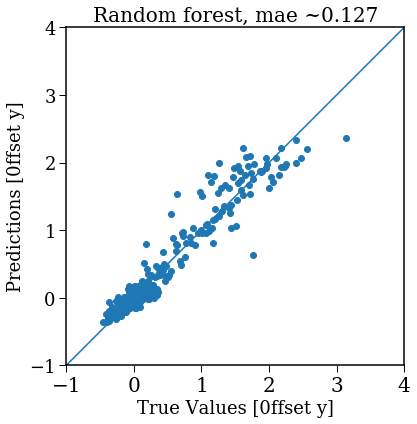

In [43]:

# Performance metrics
errors = abs(rf_hat - test_labels)

print('Metrics for Random Forest Trained  only obs1+obs2+obs3')
print('Average absolute error:', round(np.mean(errors), 4))

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / test_labels))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
print(np.sqrt(np.mean(errors **2)),'rms')
# Plot predicted RF without error bars

plt.figure(figsize=(10,6))
a = plt.axes(aspect='equal')
plt.scatter(test_labels,rf_hat)
plt.xlabel('True Values [0ffset y]',fontsize=18)
plt.title('Random forest, mae ~0.127', fontsize=20)
plt.ylabel('Predictions [0ffset y]',fontsize=18)
lims = [-1, 4]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.tight_layout()
   

#  Using only the data 3 to perform the regression:

In [44]:
data = pd.read_csv('/media/bita/disco/Pesquisa/ACT_PS/act_pointing_correction_codes/organized_tests/act_boresight/pointing_corr_arr4_f150_snrT25_obs2_FullSeason_withEverything.csv')


data.pop('Freq')
data.pop('Offset X')
data.pop('Error Offset X')
data.pop('Array')
#data.pop('APEX T')
dy_all_data = data['Error Offset Y']
data.pop('Error Offset Y')
data.pop('Modulus Offset')

data.pop('T_Pan_R8_3')#temp bizarra
data.pop('T_Pan_R1_2')#temp bizarra

data.pop('T_Pan_R8_6')
data.pop('T_Pan_R7_8')
data.pop('T_Pan_R7_5')
data.pop('T_Pan_R7_3')
data.pop('T_Pan_R6_6')
data.pop('T_Pan_R6_3')
# data.pop('T_Pan_R5_5Lo')#**
# data.pop('T_Pan_R5_5Hi')#**
data.pop('T_Pan_R4_6')
data.pop('T_Pan_R4_3')
data.pop('T_Pan_R3_7')
data.pop('T_Pan_R3_5')
data.pop('T_Pan_R2_2')
data.pop('T_Pan_R2_6')
data.pop('T_Pan_R3_1')
data.pop('T_Pan_R5_9')

# data.pop('Elevation')
# data.pop('Elevation 2 hr ago')

# data.pop('Elevation Sun')
# data.pop('Elevation Sun 2 hr ago')

# data.pop('Azimuth')
# data.pop('Azimuth 2 hr ago')

# data.pop('Azimuth Sun')
# data.pop('Azimuth Sun 2 hr ago')

# data.pop('Angular Distance')
# data.pop('Angular Distance 2 hr ago')
# data.pop('APEX T')


data['Ctime']= (data['Ctime']-1514764800)/(60*60*24) #transform ctime --> days 
data_time_all = data['Ctime']
data.pop('Ctime')
data = data.dropna()

 
data.tail()


,Offset Y,APEX T,APEX T 2 hr ago,Elevation 2 hr ago,Azimuth 2 hr ago,Angular Distance 2 hr ago,Azimuth Sun 2 hr ago,Elevation Sun 2 hr ago,Elevation,Azimuth,T_Pan_R5_5Lo,T_Pan_R5_5Hi,Elevation Sun,Azimuth Sun,Angular Distance
1467,0.1211,-0.954545,-0.918182,0.699528,0.927992,1.923560,2.481119,-0.587254,0.699528,0.927992,0.912055,0.888539,-0.226373,2.131115,1.446979
1468,-0.0695,-0.890909,-0.781818,0.699528,0.927992,1.789974,2.363467,-0.498916,0.699528,0.927992,0.654067,0.629650,-0.110557,2.062898,1.318067
1469,1.2048,4.136364,-0.400000,0.699528,0.927642,1.211229,2.011777,-0.009253,0.699528,0.862542,24.802774,25.608657,0.442908,1.841349,0.847712
1470,0.6847,7.127273,5.254545,0.699528,0.864113,0.764476,1.807493,0.557289,0.699528,5.409124,29.506207,30.144836,1.031679,1.687267,1.344860
1471,0.6625,7.227273,5.618182,0.699528,0.868476,0.711483,1.785118,0.637678,0.699528,5.409124,28.575813,29.109729,1.113681,1.668580,1.267329


In [45]:
#Dividing into training set and testing set:
train_dataset = data.sample(frac=0.75,random_state=42)
test_dataset = data.drop(train_dataset.index)
#Plotting statistics for the training set
train_stats = train_dataset.describe()
train_stats.pop("Offset Y")
train_stats = train_stats.transpose()

#Offset to compare:

train_labels = train_dataset.pop('Offset Y') #Used to learn
test_labels = test_dataset.pop('Offset Y') #Used to test the quality of the regression


print('Training Features Shape:', train_dataset.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:',test_dataset.shape)
print('Testing Labels Shape:', test_labels.shape)  

Training Features Shape: (1104, 14)
Training Labels Shape: (1104,)
Testing Features Shape: (368, 14)
Testing Labels Shape: (368,)


In [46]:

# create RandomForestRegressor
n_trees = 2000
rf_forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
rf_forest.fit(train_dataset, train_labels)
rf_hat = rf_forest.predict(test_dataset) 

Metrics for Random Forest Trained  only Obs3
Average absolute error: 0.1177
Accuracy: 64.46 %.
0.1782333178991396 rms


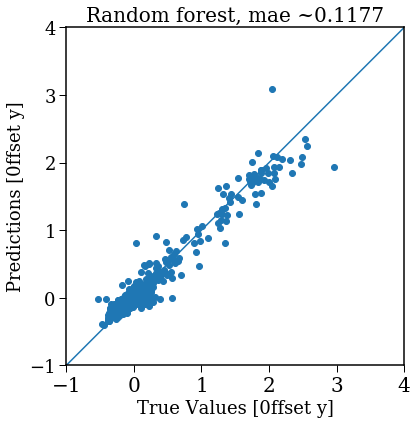

In [49]:

# Performance metrics
errors = abs(rf_hat - test_labels)

print('Metrics for Random Forest Trained  only Obs3')
print('Average absolute error:', round(np.mean(errors), 4))

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / test_labels))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
print(np.sqrt(np.mean(errors **2)),'rms')
# Plot predicted RF without error bars

plt.figure(figsize=(10,6))
a = plt.axes(aspect='equal')
plt.scatter(test_labels,rf_hat)
plt.xlabel('True Values [0ffset y]',fontsize=18)
plt.title('Random forest, mae ~0.1177', fontsize=20)
plt.ylabel('Predictions [0ffset y]',fontsize=18)
lims = [-1, 4]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.tight_layout()
   

# Testing Obs2+Obs3

In [50]:
data_obs3 = pd.read_csv('/media/bita/disco/Pesquisa/ACT_PS/act_pointing_correction_codes/organized_tests/act_boresight/pointing_corr_arr4_f150_snrT25_obs2_FullSeason_withEverything.csv')
# data_obs1 = pd.read_csv('/media/bita/disco/Pesquisa/ACT_PS/act_pointing_correction_codes/organized_tests/act_boresight/pointing_corr_arr4_f150_snrT25_obs0_FullSeason_withEverything.csv')
data_obs2 = pd.read_csv('/media/bita/disco/Pesquisa/ACT_PS/act_pointing_correction_codes/organized_tests/act_boresight/pointing_corr_arr4_f150_snrT25_obs1_FullSeason_withEverything.csv')
frames = [data_obs2, data_obs3]

data = pd.concat(frames)

data.pop('Freq')
data.pop('Offset X')
data.pop('Error Offset X')
data.pop('Array')
#data.pop('APEX T')
dy_all_data = data['Error Offset Y']
data.pop('Error Offset Y')
data.pop('Modulus Offset')

data.pop('T_Pan_R8_3')#temp bizarra
data.pop('T_Pan_R1_2')#temp bizarra

data.pop('T_Pan_R8_6')
data.pop('T_Pan_R7_8')
data.pop('T_Pan_R7_5')
data.pop('T_Pan_R7_3')
data.pop('T_Pan_R6_6')
data.pop('T_Pan_R6_3')
# data.pop('T_Pan_R5_5Lo')#**
# data.pop('T_Pan_R5_5Hi')#**
data.pop('T_Pan_R4_6')
data.pop('T_Pan_R4_3')
data.pop('T_Pan_R3_7')
data.pop('T_Pan_R3_5')
data.pop('T_Pan_R2_2')
data.pop('T_Pan_R2_6')
data.pop('T_Pan_R3_1')
data.pop('T_Pan_R5_9')

# data.pop('Elevation')
# data.pop('Elevation 2 hr ago')

# data.pop('Elevation Sun')
# data.pop('Elevation Sun 2 hr ago')

# data.pop('Azimuth')
# data.pop('Azimuth 2 hr ago')

# data.pop('Azimuth Sun')
# data.pop('Azimuth Sun 2 hr ago')

# data.pop('Angular Distance')
# data.pop('Angular Distance 2 hr ago')
# data.pop('APEX T')


data['Ctime']= (data['Ctime']-1514764800)/(60*60*24) #transform ctime --> days 
data_time_all = data['Ctime']
data.pop('Ctime')
data = data.dropna()

 
data.tail()


,Offset Y,APEX T,APEX T 2 hr ago,Elevation 2 hr ago,Azimuth 2 hr ago,Angular Distance 2 hr ago,Azimuth Sun 2 hr ago,Elevation Sun 2 hr ago,Elevation,Azimuth,T_Pan_R5_5Lo,T_Pan_R5_5Hi,Elevation Sun,Azimuth Sun,Angular Distance
1467,0.1211,-0.954545,-0.918182,0.699528,0.927992,1.923560,2.481119,-0.587254,0.699528,0.927992,0.912055,0.888539,-0.226373,2.131115,1.446979
1468,-0.0695,-0.890909,-0.781818,0.699528,0.927992,1.789974,2.363467,-0.498916,0.699528,0.927992,0.654067,0.629650,-0.110557,2.062898,1.318067
1469,1.2048,4.136364,-0.400000,0.699528,0.927642,1.211229,2.011777,-0.009253,0.699528,0.862542,24.802774,25.608657,0.442908,1.841349,0.847712
1470,0.6847,7.127273,5.254545,0.699528,0.864113,0.764476,1.807493,0.557289,0.699528,5.409124,29.506207,30.144836,1.031679,1.687267,1.344860
1471,0.6625,7.227273,5.618182,0.699528,0.868476,0.711483,1.785118,0.637678,0.699528,5.409124,28.575813,29.109729,1.113681,1.668580,1.267329


In [51]:
#Dividing into training set and testing set:
train_dataset = data.sample(frac=0.75,random_state=42)
test_dataset = data.drop(train_dataset.index)
#Plotting statistics for the training set
train_stats = train_dataset.describe()
train_stats.pop("Offset Y")
train_stats = train_stats.transpose()

#Offset to compare:

train_labels = train_dataset.pop('Offset Y') #Used to learn
test_labels = test_dataset.pop('Offset Y') #Used to test the quality of the regression


print('Training Features Shape:', train_dataset.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:',test_dataset.shape)
print('Testing Labels Shape:', test_labels.shape)  

Training Features Shape: (1287, 14)
Training Labels Shape: (1287,)
Testing Features Shape: (341, 14)
Testing Labels Shape: (341,)


In [52]:

# create RandomForestRegressor
n_trees = 2000
rf_forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
rf_forest.fit(train_dataset, train_labels)
rf_hat = rf_forest.predict(test_dataset) 

Metrics for Random Forest Trained with Obs 2+ Obs3
Average absolute error: 0.1264
Accuracy: 84.1 %.
0.20943800305463878 rms


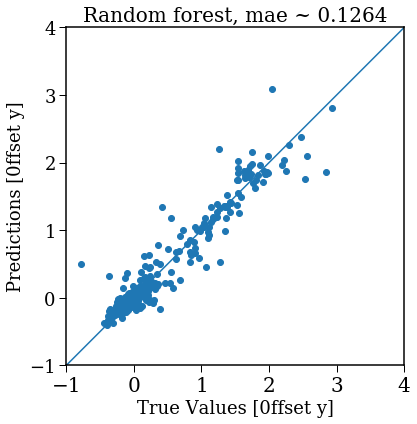

In [55]:

# Performance metrics
errors = abs(rf_hat - test_labels)

print('Metrics for Random Forest Trained with Obs 2+ Obs3')
print('Average absolute error:', round(np.mean(errors), 4))

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / test_labels))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
print(np.sqrt(np.mean(errors **2)),'rms')
# Plot predicted RF without error bars

plt.figure(figsize=(10,6))
a = plt.axes(aspect='equal')
plt.scatter(test_labels,rf_hat)
plt.xlabel('True Values [0ffset y]',fontsize=18)
plt.title('Random forest, mae ~ 0.1264', fontsize=20)
plt.ylabel('Predictions [0ffset y]',fontsize=18)
lims = [-1, 4]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.tight_layout()
   